In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [3]:
key = 'aefa2d206ec2ec3dd9ed55be90cfb0e122bf0a4e'

In [4]:
df = pdr.get_data_tiingo("AAPL",api_key=key)

In [5]:
df.to_csv('aapl.csv')
df = pd.read_csv('aapl.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-07-02 00:00:00+00:00,126.44,126.69,125.77,126.43,27210952,116.517419,116.747800,115.899998,116.508204,27210952,0.0,1.0
1,AAPL,2015-07-06 00:00:00+00:00,126.00,126.23,124.85,124.94,28060431,116.111949,116.323899,115.052197,115.135134,28060431,0.0,1.0
2,AAPL,2015-07-07 00:00:00+00:00,125.69,126.15,123.77,125.89,46946811,115.826276,116.250177,114.056951,116.010581,46946811,0.0,1.0
3,AAPL,2015-07-08 00:00:00+00:00,122.57,124.64,122.54,124.48,60761614,112.951123,114.858677,112.923478,114.711233,60761614,0.0,1.0
4,AAPL,2015-07-09 00:00:00+00:00,120.07,124.06,119.22,123.85,78595038,110.647315,114.324193,109.864020,114.130673,78595038,0.0,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1257 non-null   object 
 1   date         1257 non-null   object 
 2   close        1257 non-null   float64
 3   high         1257 non-null   float64
 4   low          1257 non-null   float64
 5   open         1257 non-null   float64
 6   volume       1257 non-null   int64  
 7   adjClose     1257 non-null   float64
 8   adjHigh      1257 non-null   float64
 9   adjLow       1257 non-null   float64
 10  adjOpen      1257 non-null   float64
 11  adjVolume    1257 non-null   int64  
 12  divCash      1257 non-null   float64
 13  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.6+ KB


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-06-23 00:00:00+00:00,366.53,372.3800,362.2701,364.00,53038869,366.53,372.3800,362.2701,364.00,53038869,0.0,1.0
1253,AAPL,2020-06-24 00:00:00+00:00,360.06,368.7900,358.5200,365.00,48155849,360.06,368.7900,358.5200,365.00,48155849,0.0,1.0
1254,AAPL,2020-06-25 00:00:00+00:00,364.84,365.0000,357.5700,360.70,34380628,364.84,365.0000,357.5700,360.70,34380628,0.0,1.0
1255,AAPL,2020-06-26 00:00:00+00:00,353.63,365.3200,353.0200,364.41,51314211,353.63,365.3200,353.0200,364.41,51314211,0.0,1.0
1256,AAPL,2020-06-29 00:00:00+00:00,361.78,362.1736,351.2800,353.25,32661519,361.78,362.1736,351.2800,353.25,32661519,0.0,1.0


In [9]:
df1 = df.reset_index()['close']
df1

0       126.44
1       126.00
2       125.69
3       122.57
4       120.07
         ...  
1252    366.53
1253    360.06
1254    364.84
1255    353.63
1256    361.78
Name: close, Length: 1257, dtype: float64

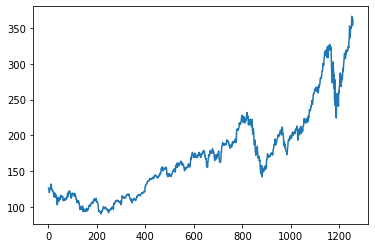

In [10]:
plt.plot(df1)

In [11]:
scalar = MinMaxScaler()
df2 = scalar.fit_transform(np.array(df1).reshape(-1,1))
type(df2)

numpy.ndarray

In [12]:
print(df2.shape)
df2

(1257, 1)


array([[0.13070712],
       [0.12911402],
       [0.1279916 ],
       ...,
       [0.99388102],
       [0.95329302],
       [0.98280169]])

In [13]:
training_size=int(len(df2)*0.7)
test_size = len(df2)-training_size
print(training_size,test_size)

879 378


In [14]:
train_data,test_data = df2[0:training_size,:], df2[training_size:]

In [15]:
print(len(train_data),len(test_data))

879 378


In [16]:
def create_dataset(dataset,time_step =1):
  X_data,y_data = [],[]
  for i in range(len(dataset)-time_step-1):
    X_data.append(dataset[i:(i+time_step)])
    y_data.append(dataset[i+time_step])

  return np.array(X_data),np.array(y_data)


In [17]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)


(778, 100, 1) (778, 1)
(277, 100, 1) (277, 1)


In [19]:
test_data[-3:]

array([[0.99388102],
       [0.95329302],
       [0.98280169]])

In [20]:
y_test[-2:]

array([[0.99388102],
       [0.95329302]])

In [21]:
y_test[:5]

array([[0.32340056],
       [0.32090228],
       [0.31822296],
       [0.31514537],
       [0.31847641]])

In [22]:
# # reshape input to be [samples, time steps, features] which is required for LSTM      # it's already in format so no need
# X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
# X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
#model.add(tf.keras.layers.Flatten())
#model.add(Dense(10))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
type(X_train)

numpy.ndarray

In [25]:

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 1s 109ms/step - loss: 0.0165 - val_loss: 0.0764
Epoch 2/100
13/13 [==============================] - 0s 22ms/step - loss: 0.0038 - val_loss: 0.0051
Epoch 3/100
13/13 [==============================] - 0s 22ms/step - loss: 0.0012 - val_loss: 0.0037
Epoch 4/100
13/13 [==============================] - 0s 22ms/step - loss: 8.2403e-04 - val_loss: 0.0049
Epoch 5/100
13/13 [==============================] - 0s 23ms/step - loss: 7.2139e-04 - val_loss: 0.0074
Epoch 6/100
13/13 [==============================] - 0s 22ms/step - loss: 6.9821e-04 - val_loss: 0.0060
Epoch 7/100
13/13 [==============================] - 0s 24ms/step - loss: 6.6907e-04 - val_loss: 0.0054
Epoch 8/100
13/13 [==============================] - 0s 24ms/step - loss: 6.4810e-04 - val_loss: 0.0068
Epoch 9/100
13/13 [==============================] - 0s 23ms/step - loss: 6.3261e-04 - val_loss: 0.0071
Epoch 10/100
13/13 [==============================] - 0s 22ms/step - loss: 

In [26]:
train_predict = model.predict(X_train)
train_predict=scalar.inverse_transform(train_predict)

In [27]:
test_predict = model.predict(X_test)
test_predict=scalar.inverse_transform(test_predict)

In [28]:
test_predict[-10:]

array([[333.6213 ],
       [333.25903],
       [337.26413],
       [341.2106 ],
       [343.58224],
       [343.90054],
       [346.73526],
       [352.22226],
       [354.18573],
       [355.7466 ]], dtype=float32)

In [29]:
scalar.inverse_transform(y_test)[-10:]

array([[342.99],
       [352.08],
       [351.59],
       [351.73],
       [349.72],
       [358.87],
       [366.53],
       [360.06],
       [364.84],
       [353.63]])

In [30]:
len(test_predict),len(train_predict)

(277, 778)

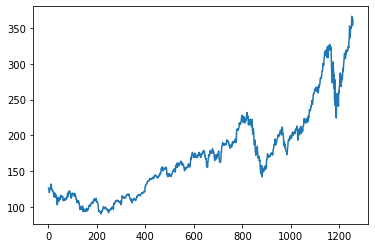

In [31]:
plt.plot(df1)

In [32]:
print(len(train_predict),len(test_predict))

778 277


In [33]:
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:5]

array([[7.06481305e-315],
       [1.00000000e+000],
       [2.00000000e+000],
       [3.00000000e+000],
       [4.00000000e+000]])

In [34]:
trainPredictPlot[:, :] = np.nan
trainPredictPlot

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

In [37]:
look_back=100
trainPredictPlot[100:len(train_predict)+look_back] = train_predict
# for i,j in enumerate(trainPredictPlot):
#   print(i,j)

In [38]:
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# for i,j in enumerate(testPredictPlot):
#   print(i,j)

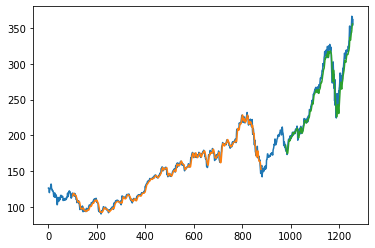

In [39]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict

#testPredictPlot[len(train_predict)+(look_back*2):, :] = test_predict

# plot baseline and predictions
plt.plot((scalar.inverse_transform(df2)))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [40]:
len(test_data)

378

In [41]:
x_input = test_data[278:]
x_input.shape

(100, 1)

In [42]:
type(x_input)

numpy.ndarray

In [43]:
x_input[:5]

array([[0.85039285],
       [0.83163764],
       [0.8371411 ],
       [0.83011695],
       [0.85759803]])

In [44]:
# temp_input = list(x_input)
# #temp_input = temp_input[0].tolist()
# temp_input

In [45]:
temp_input =  [i[0] for i in x_input]    # conver 2d array to list for storing future predictions
len(temp_input)

100

In [46]:
temp_input[:5]

[0.850392845504906,
 0.831637640754553,
 0.8371410985191355,
 0.8301169484774976,
 0.8575980303414318]

In [47]:
n_steps = 100
n_featurs = 1

In [48]:
demo = np.array(temp_input[0:]) 
print(demo.shape)
print(demo.reshape(1,-1).shape)
print(demo.reshape(1, n_steps, 1).shape)

(100,)
(1, 100)
(1, 100, 1)


In [49]:
# x_input = test_data[278:]
# temp_input =  [i[0] for i in x_input] 
# lst_output = []
# i=0
# while(i<30):

#   if len(temp_input) > 100:  # len(temp_input) > n-steps
#     x_input = np.array(temp_input[i:])      # convert list to array for input
#     print('{} day input shape {}'.format(i,x_input))
#     x_input=x_input.reshape(1,-1)
#     x_input = x_input.reshape((1, n_steps, 1))
#     yhat = model.predict(x_input, verbose=0)   # output shape will be (1,1) 
#     print("{} day output {}".format(i,yhat[0][0]))
#     temp_input.extend(yhat[0].tolist())
#     lst_output.extend(yhat.tolist())
    

#   else:
#     x_input = x_input.reshape((1, n_steps,1))
#     yhat = model.predict(x_input, verbose=0)
#     print(yhat[0])
#     temp_input.extend(yhat[0].tolist())
#     print(len(temp_input))
#     lst_output.extend(yhat.tolist())

#   i+=1

# print(lst_output)

In [50]:
X_test[-1][:10]

array([[0.82736522],
       [0.83677903],
       [0.85039285],
       [0.83163764],
       [0.8371411 ],
       [0.83011695],
       [0.85759803],
       [0.84916181],
       [0.84945146],
       [0.82790832]])

In [51]:
test_data[278:][:10]

array([[0.85039285],
       [0.83163764],
       [0.8371411 ],
       [0.83011695],
       [0.85759803],
       [0.84916181],
       [0.84945146],
       [0.82790832],
       [0.84463594],
       [0.83261523]])

In [52]:
#x_input=test_data[278:].reshape(1,-1)
x_input= X_test[-1].reshape(1,-1)

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output = []
i=0
while(i<30):
  if len(temp_input) > 100:  # len(temp_input) > n-steps
    x_input = np.array(temp_input[1:])      # convert list to array for input
    print('{} day input shape {}'.format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)    
    print("{} day output {}".format(i,yhat[0][0]))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]
    lst_output.extend(yhat.tolist())
    

  else:
    x_input = x_input.reshape((1, n_steps,1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())

  i+=1

print(lst_output)

[0.96095675]
101
1 day input shape [0.83677903 0.85039285 0.83163764 0.8371411  0.83011695 0.85759803
 0.84916181 0.84945146 0.82790832 0.84463594 0.83261523 0.80636518
 0.75252544 0.71595641 0.73250299 0.66323907 0.66265976 0.75480647
 0.72044607 0.76903581 0.73348057 0.71939607 0.63662696 0.7060357
 0.6701546  0.57167168 0.67935117 0.54987509 0.5884355  0.56602339
 0.55918027 0.50291466 0.48528187 0.56678374 0.56185959 0.60863898
 0.56989753 0.59549585 0.59361309 0.54516818 0.55972338 0.54697853
 0.62323038 0.61222347 0.63626489 0.64321663 0.66226149 0.71222709
 0.70274087 0.71092364 0.69683913 0.67558565 0.64459249 0.67258047
 0.66870633 0.69745465 0.69817879 0.6815598  0.71468916 0.73666679
 0.7195409  0.73434954 0.7502806  0.76139614 0.7726565  0.79579275
 0.81346175 0.80042724 0.78681343 0.79365654 0.78703067 0.81328071
 0.80669105 0.82874108 0.82012383 0.82751005 0.81968934 0.8246859
 0.8251928  0.82407039 0.83822731 0.84362214 0.85006698 0.83992903
 0.87316702 0.88026359 0.9183

In [53]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [55]:
scalar.inverse_transform(lst_output)

array([[355.74664542],
       [353.62193423],
       [350.4892915 ],
       [347.50261917],
       [344.94452392],
       [342.81237181],
       [341.01562071],
       [339.43189056],
       [337.93129456],
       [336.39532128],
       [334.72870392],
       [332.86663078],
       [330.77542018],
       [328.44893172],
       [325.90236002],
       [323.16426701],
       [320.26960194],
       [317.25285315],
       [314.14366907],
       [310.9644383 ],
       [307.72856108],
       [304.44166747],
       [301.10253928],
       [297.70518427],
       [294.24069638],
       [290.69936291],
       [287.07173455],
       [283.34986005],
       [279.52812581],
       [275.60271259]])

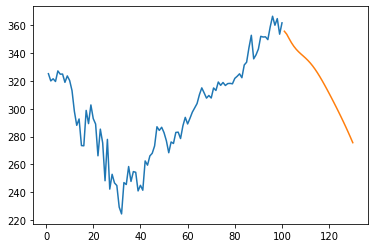

In [57]:
plt.plot(day_new,scalar.inverse_transform(df2[1157:]))
plt.plot(day_pred,scalar.inverse_transform(np.array(lst_output).reshape(-1,1)))